## Import Necessary Libraries

In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

##Import Dataset and Basic EDA

Import dataset

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("supermarket.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

Check dataset

In [ ]:
df.tail()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
578077,200738,20071116,6,12,1,0.01,PRD0903678,CL00222,DEP00076,G00023,...,UM,NaN,9.941080e+14,S,MM,Small Shop,Grocery,STORE00001,LS,E02
578078,200716,20070612,3,12,1,13.76,PRD0902312,CL00230,DEP00081,G00027,...,UM,OA,9.941060e+14,L,UM,Top Up,Fresh,STORE00001,LS,E02
578079,200637,20061109,5,16,1,4.47,PRD0900396,CL00229,DEP00081,G00027,...,UM,NaN,9.941030e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578080,200717,20070624,1,10,1,4.92,PRD0903065,CL00229,DEP00081,G00027,...,UM,YF,9.941060e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578081,200744,20071229,7,14,1,9.27,PRD0901923,CL00229,DEP00081,G00027,...,UM,NaN,9.941090e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02


Convert SHOP_DATE to datetime format

In [ ]:
# Assuming your DataFrame is named 'df'
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')

## Explore Dataset

Check for member and non-member purchase number and amount

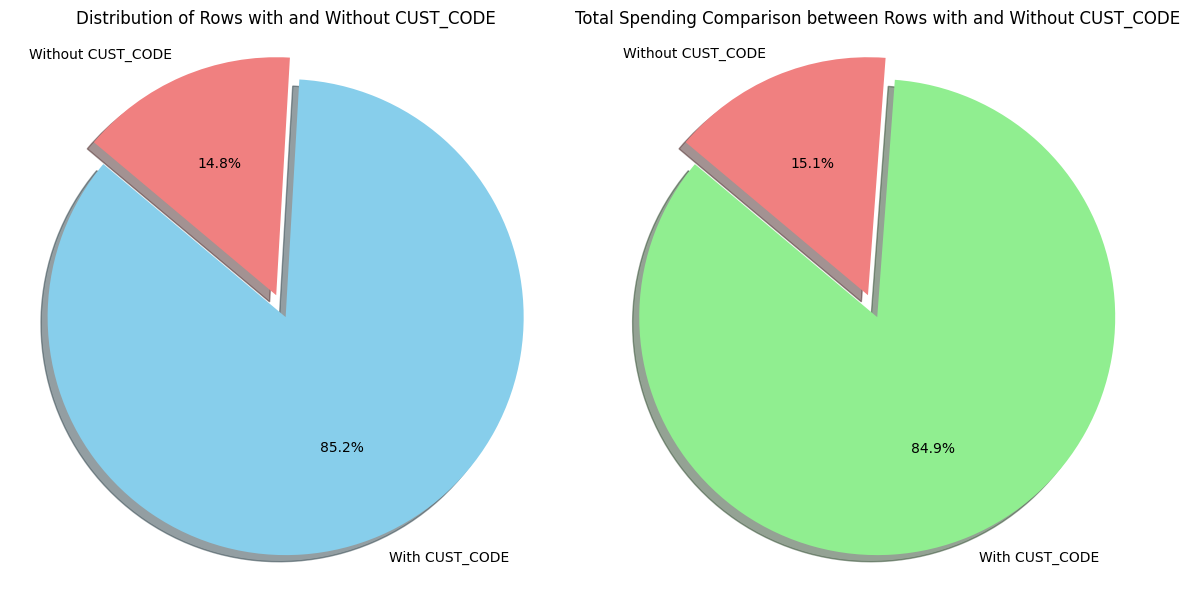

In [ ]:
# Count the number of rows with and without 'CUST_CODE'
with_cust_code = df['CUST_CODE'].notnull().sum()
without_cust_code = len(df) - with_cust_code

# Calculate total spending for each group
total_spending_with_cust = df[df['CUST_CODE'].notnull()]['SPEND'].sum()
total_spending_without_cust = df[df['CUST_CODE'].isnull()]['SPEND'].sum()

# Create two pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for row counts
labels_row = ['With CUST_CODE', 'Without CUST_CODE']
sizes_row = [with_cust_code, without_cust_code]
colors_row = ['skyblue', 'lightcoral']
explode_row = (0.1, 0)  # explode 1st slice
ax1.pie(sizes_row, explode=explode_row, labels=labels_row, colors=colors_row, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of Rows with and Without CUST_CODE')

# Pie chart for total spending
labels_spending = ['With CUST_CODE', 'Without CUST_CODE']
sizes_spending = [total_spending_with_cust, total_spending_without_cust]
colors_spending = ['lightgreen', 'lightcoral']
explode_spending = (0.1, 0)  # explode 1st slice
ax2.pie(sizes_spending, explode=explode_spending, labels=labels_spending, colors=colors_spending, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Total Spending Comparison between Rows with and Without CUST_CODE')

plt.tight_layout()
plt.show()

Show Top product and produce group

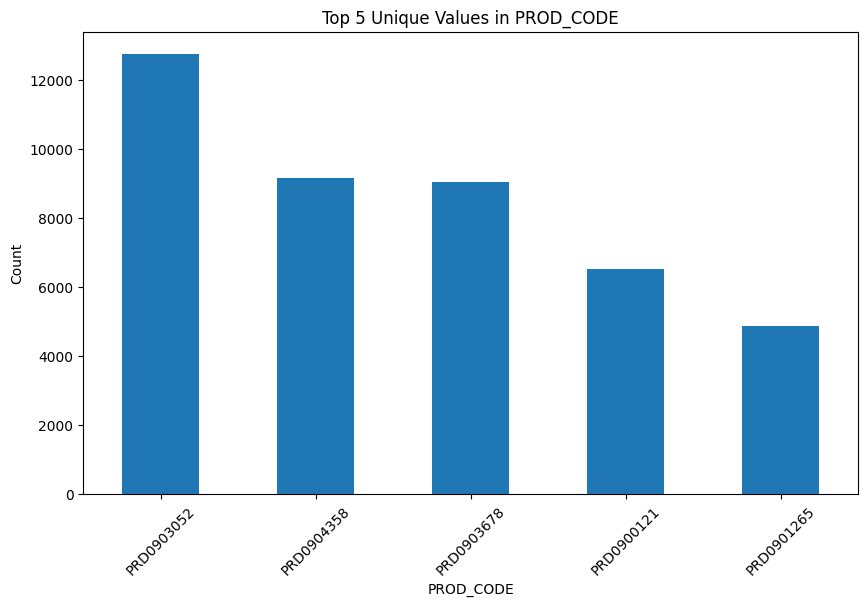

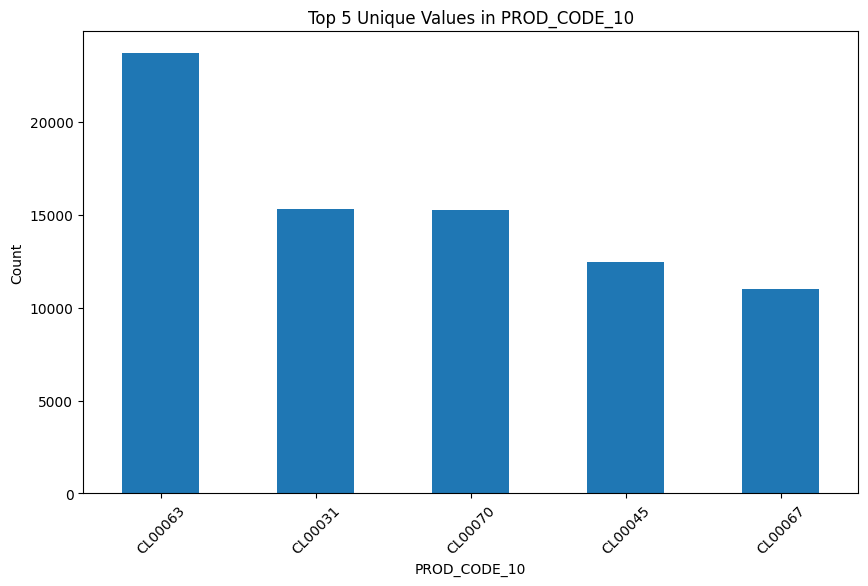

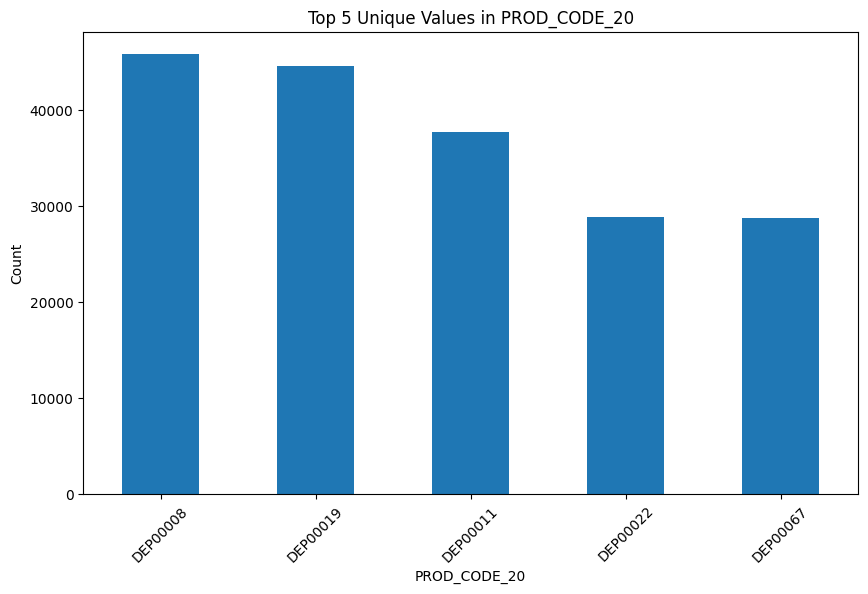

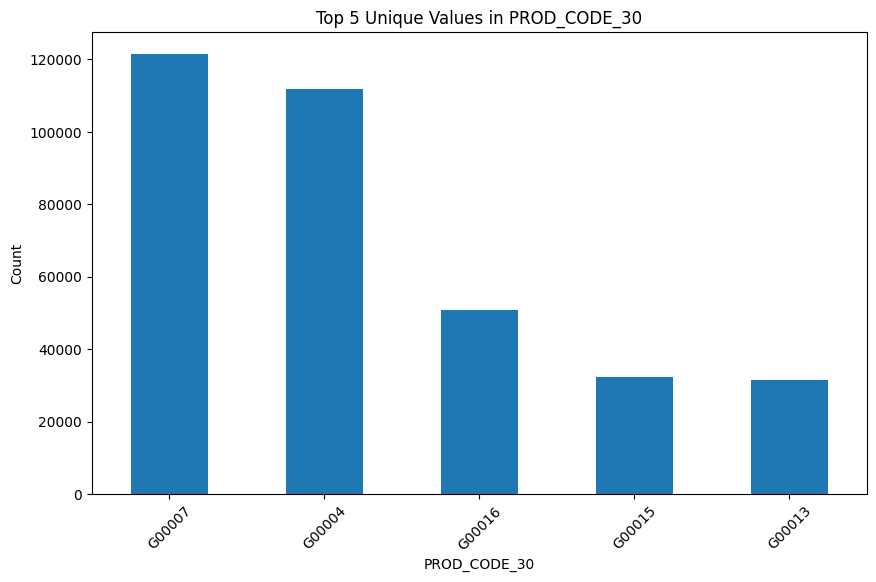

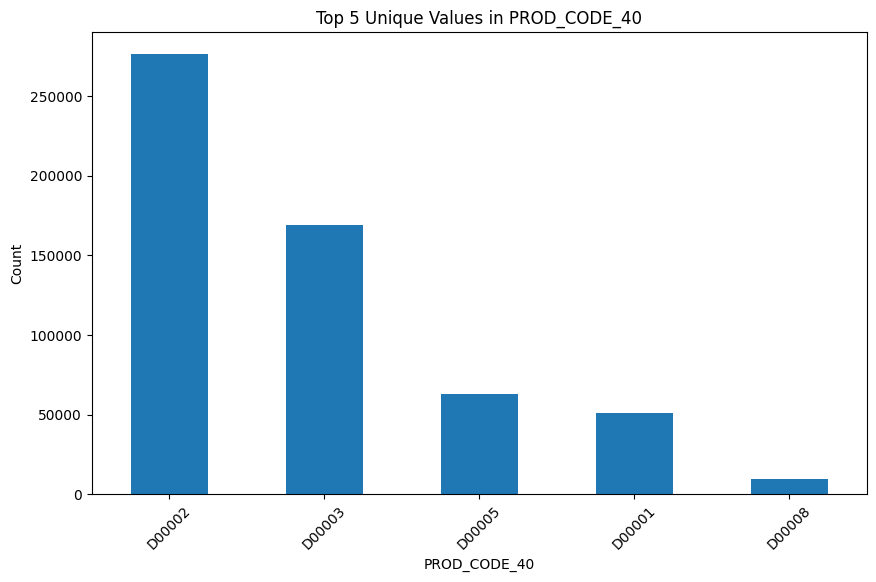

In [ ]:
# Columns to consider
prod_columns = ['PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30', 'PROD_CODE_40']

# Display the top 5 unique values in each column using bar charts
top_n = 5  # Set the number of top unique values to display

for column in prod_columns:
    top_values = df[column].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    top_values.plot(kind='bar')
    plt.title(f"Top {top_n} Unique Values in {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## Creating Customer Single View

In [ ]:
import pandas as pd
from datetime import datetime

# Load your DataFrame or use the existing one
# ...

# Convert SHOP_DATE to datetime format
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')

# Get unique customer codes
unique_customers = df['CUST_CODE'].unique()

# Initialize a new DataFrame for the single customer view
customer_view_df = pd.DataFrame(columns=[
    'CUST_CODE', 'Total_SPEND', 'Avg_QUANTITY', 'CUST_LIFESTAGE', 'CUST_PRICE_SENSITIVITY', 'Num_PURCHASES',
    'Monday_Purchases', 'Tuesday_Purchases', 'Wednesday_Purchases', 'Thursday_Purchases', 'Friday_Purchases', 'Saturday_Purchases', 'Sunday_Purchases',
    'First_Purchase_Date', 'Last_Purchase_Date', 'Mode_Purchase_Time', 'Days_Between_Purchases'
])

# Iterate through unique customers
for cust_code in unique_customers:
    customer_rows = df[df['CUST_CODE'] == cust_code]

    if not customer_rows.empty:  # Check if there are any rows for the customer
        # Aggregate customer data
        total_spend = customer_rows['SPEND'].sum()
        avg_quantity = customer_rows['QUANTITY'].mean()
        num_purchases = len(customer_rows)
        cust_lifestage = customer_rows['CUST_LIFESTAGE'].iloc[0] if 'CUST_LIFESTAGE' in customer_rows.columns else ''
        cust_price_sensitivity = customer_rows['CUST_PRICE_SENSITIVITY'].iloc[0] if 'CUST_PRICE_SENSITIVITY' in customer_rows.columns else ''

        # Calculate the number of purchases for each day of the week
        purchases_by_day = customer_rows['SHOP_DATE'].dt.day_name().value_counts()
        purchases_by_day = purchases_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

        # Calculate additional customer-specific values
        first_purchase_date = customer_rows['SHOP_DATE'].min()
        last_purchase_date = customer_rows['SHOP_DATE'].max()
        mode_purchase_time = customer_rows['SHOP_HOUR'].mode().iloc[0]

        # Calculate days between purchases
        days_between_purchases = customer_rows['SHOP_DATE'].diff().dt.days

        # Append aggregated data to customer view DataFrame
        customer_view_df = customer_view_df.append({
            'CUST_CODE': cust_code,
             'CUST_LIFESTAGE': cust_lifestage,
            'CUST_PRICE_SENSITIVITY': cust_price_sensitivity,
            'Total_SPEND': total_spend,
            'Avg_QUANTITY': avg_quantity,
            'Num_PURCHASES': num_purchases,
            'Monday_Purchases': purchases_by_day['Monday'],
            'Tuesday_Purchases': purchases_by_day['Tuesday'],
            'Wednesday_Purchases': purchases_by_day['Wednesday'],
            'Thursday_Purchases': purchases_by_day['Thursday'],
            'Friday_Purchases': purchases_by_day['Friday'],
            'Saturday_Purchases': purchases_by_day['Saturday'],
            'Sunday_Purchases': purchases_by_day['Sunday'],
            'First_Purchase_Date': first_purchase_date,
            'Last_Purchase_Date': last_purchase_date,
            'Mode_Purchase_Time': mode_purchase_time
        }, ignore_index=True)


Show Customer Single View Table

In [ ]:
from tabulate import tabulate

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Display a sample of rows from the DataFrame
sample_rows = customer_view_df.sample(n=10)  # Change the value to the desired number of sample rows

# Convert the sample DataFrame to a list of dictionaries for tabulate
sample_rows_list = sample_rows.to_dict(orient='records')

# Display the sample rows in a tabular format
print(tabulate(sample_rows_list, headers='keys', tablefmt='pretty'))

+----------------+--------------------+--------------------+----------------+------------------------+---------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+---------------------+---------------------+--------------------+------------------------+
|   CUST_CODE    |    Total_SPEND     |    Avg_QUANTITY    | CUST_LIFESTAGE | CUST_PRICE_SENSITIVITY | Num_PURCHASES | Monday_Purchases | Tuesday_Purchases | Wednesday_Purchases | Thursday_Purchases | Friday_Purchases | Saturday_Purchases | Sunday_Purchases | First_Purchase_Date | Last_Purchase_Date  | Mode_Purchase_Time | Days_Between_Purchases |
+----------------+--------------------+--------------------+----------------+------------------------+---------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+---------------------+-------------------